# 0. IMPORTACIONES DE SOFTWARE Y CÓDIGO

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import plotly.express as px
import numpy as np
from datetime import datetime

from utils.functions import reorder_columns, shorten_column_titles, clarify_name_acc

# I. IMPORTACION & PRIMERA EXPLORACIÓN DE LOS DATOS

In [5]:
#introduccion de nuestro primer fichero de datos:
acc_2012 = pd.read_excel("Data_ACC/datos_brutos/TF_ACCIDENTS_2012.xlsx")
acc_2012.head()

,DT_DAY,DT_HOUR,CD_DAY_OF_WEEK,TX_DAY_OF_WEEK_DESCR_FR,TX_DAY_OF_WEEK_DESCR_NL,CD_BUILD_UP_AREA,TX_BUILD_UP_AREA_DESCR_NL,TX_BUILD_UP_AREA_DESCR_FR,CD_COLL_TYPE,TX_COLL_TYPE_DESCR_NL,...,TX_PROV_DESCR_FR,CD_RGN_REFNIS,TX_RGN_DESCR_NL,TX_RGN_DESCR_FR,MS_ACCT,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,MS_ACCT_WITH_MORY_INJ,MS_ACCT_WITH_SERLY_INJ,MS_ACCT_WITH_SLY_INJ
0,2012-08-27,14,1,Lundi,maandag,2.0,Buiten bebouwde kom,Hors agglomération,6.0,Tegen een hindernis op de rijbaan,...,Province d’Anvers,2000,Vlaams Gewest,Région flamande,1,0,0,0,0,1
1,2012-10-26,1,5,Vendredi,vrijdag,NaN,Niet beschikbaar,Non disponible,2.0,Frontale botsing (of bij het kruisen),...,Province d’Anvers,2000,Vlaams Gewest,Région flamande,1,0,0,0,1,0
2,2012-09-16,17,7,Dimanche,zondag,2.0,Buiten bebouwde kom,Hors agglomération,4.0,Langs opzij,...,Province d’Anvers,2000,Vlaams Gewest,Région flamande,1,0,0,0,0,1
3,2012-09-06,16,4,Jeudi,donderdag,NaN,Niet beschikbaar,Non disponible,NaN,Niet beschikbaar,...,Province d’Anvers,2000,Vlaams Gewest,Région flamande,1,0,0,0,0,1
4,2012-12-23,24,7,Dimanche,zondag,1.0,Binnen bebouwde kom,En agglomération,7.0,Tegen een hindernis buiten de rijbaan,...,Province d’Anvers,2000,Vlaams Gewest,Région flamande,1,0,0,0,0,1


In [6]:
#aplicamos shape para tener primera idea de nº columnas y filas
acc_2012.shape

(44051, 35)

In [ ]:
#más info sobre tipos de datos y valores ausentes en nuestro DF:
acc_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44051 entries, 0 to 44050
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DT_DAY                     44051 non-null  datetime64[ns]
 1   DT_HOUR                    44051 non-null  int64         
 2   CD_DAY_OF_WEEK             44051 non-null  int64         
 3   TX_DAY_OF_WEEK_DESCR_FR    44051 non-null  object        
 4   TX_DAY_OF_WEEK_DESCR_NL    44051 non-null  object        
 5   CD_BUILD_UP_AREA           35387 non-null  float64       
 6   TX_BUILD_UP_AREA_DESCR_NL  44051 non-null  object        
 7   TX_BUILD_UP_AREA_DESCR_FR  44051 non-null  object        
 8   CD_COLL_TYPE               37291 non-null  float64       
 9   TX_COLL_TYPE_DESCR_NL      44051 non-null  object        
 10  TX_COLL_TYPE_DESCR_FR      44051 non-null  object        
 11  CD_LIGHT_COND              38596 non-null  float64       
 12  TX_L

>> vistazo sobre todas las columnas + indicación de índice correspondiente:

In [6]:
#preparación para poder seleccionar por indice fluidamente las columnas relevantes (sin conteo manual):
todas_col = enumerate(acc_2012.columns)
for i in todas_col:
    print (i)

(0, 'DT_DAY')
(1, 'DT_HOUR')
(2, 'CD_DAY_OF_WEEK')
(3, 'TX_DAY_OF_WEEK_DESCR_FR')
(4, 'TX_DAY_OF_WEEK_DESCR_NL')
(5, 'CD_BUILD_UP_AREA')
(6, 'TX_BUILD_UP_AREA_DESCR_NL')
(7, 'TX_BUILD_UP_AREA_DESCR_FR')
(8, 'CD_COLL_TYPE')
(9, 'TX_COLL_TYPE_DESCR_NL')
(10, 'TX_COLL_TYPE_DESCR_FR')
(11, 'CD_LIGHT_COND')
(12, 'TX_LIGHT_COND_DESCR_NL')
(13, 'TX_LIGHT_COND_DESCR_FR')
(14, 'CD_ROAD_TYPE')
(15, 'TX_ROAD_TYPE_DESCR_NL')
(16, 'TX_ROAD_TYPE_DESCR_FR')
(17, 'CD_MUNTY_REFNIS')
(18, 'TX_MUNTY_DESCR_NL')
(19, 'TX_MUNTY_DESCR_FR')
(20, 'CD_DSTR_REFNIS')
(21, 'TX_ADM_DSTR_DESCR_NL')
(22, 'TX_ADM_DSTR_DESCR_FR')
(23, 'CD_PROV_REFNIS')
(24, 'TX_PROV_DESCR_NL')
(25, 'TX_PROV_DESCR_FR')
(26, 'CD_RGN_REFNIS')
(27, 'TX_RGN_DESCR_NL')
(28, 'TX_RGN_DESCR_FR')
(29, 'MS_ACCT')
(30, 'MS_ACCT_WITH_DEAD')
(31, 'MS_ACCT_WITH_DEAD_30_DAYS')
(32, 'MS_ACCT_WITH_MORY_INJ')
(33, 'MS_ACCT_WITH_SERLY_INJ')
(34, 'MS_ACCT_WITH_SLY_INJ')


In [7]:
#exploracion de nº accidentes por día
A = acc_2012.groupby(["CD_DAY_OF_WEEK"])["CD_DAY_OF_WEEK"].count()
A

CD_DAY_OF_WEEK
1    6267
2    6311
3    6662
4    6415
5    6905
6    6138
7    5353
Name: CD_DAY_OF_WEEK, dtype: int64

# II. LIMPIAR LOS DATOS DEL DATAFRAME PARA NUESTRO PROPÓSITO

## II.1. limpiar DB original (parte columnas): eliminar columnas irrelevantes

In [8]:
#mantener columnas relevantes solo - si opcion entre varias: selección de las en las cuales menos valores faltan
acc_2012_col = acc_2012.iloc[:,[0,2,6,12,15,18,21,24,27,29,30,31,32,33,34]]
acc_2012_col.head(5)

,DT_DAY,CD_DAY_OF_WEEK,TX_BUILD_UP_AREA_DESCR_NL,TX_LIGHT_COND_DESCR_NL,TX_ROAD_TYPE_DESCR_NL,TX_MUNTY_DESCR_NL,TX_ADM_DSTR_DESCR_NL,TX_PROV_DESCR_NL,TX_RGN_DESCR_NL,MS_ACCT,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,MS_ACCT_WITH_MORY_INJ,MS_ACCT_WITH_SERLY_INJ,MS_ACCT_WITH_SLY_INJ
0,2012-08-27,1,Buiten bebouwde kom,Bij klaarlichte dag,Autosnelweg,Aartselaar,Arrondissement Antwerpen,Provincie Antwerpen,Vlaams Gewest,1,0,0,0,0,1
1,2012-10-26,5,Niet beschikbaar,Niet beschikbaar,"Gewestweg, provincieweg of gemeenteweg",Aartselaar,Arrondissement Antwerpen,Provincie Antwerpen,Vlaams Gewest,1,0,0,0,1,0
2,2012-09-16,7,Buiten bebouwde kom,Bij klaarlichte dag,"Gewestweg, provincieweg of gemeenteweg",Aartselaar,Arrondissement Antwerpen,Provincie Antwerpen,Vlaams Gewest,1,0,0,0,0,1
3,2012-09-06,4,Niet beschikbaar,Bij klaarlichte dag,"Gewestweg, provincieweg of gemeenteweg",Aartselaar,Arrondissement Antwerpen,Provincie Antwerpen,Vlaams Gewest,1,0,0,0,0,1
4,2012-12-23,7,Binnen bebouwde kom,"Nacht, ontstoken openbare verlichting","Gewestweg, provincieweg of gemeenteweg",Aartselaar,Arrondissement Antwerpen,Provincie Antwerpen,Vlaams Gewest,1,0,0,0,0,1


In [9]:
#nuevo vistazo sobre tipos de datos y valores ausentes:
acc_2012_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44051 entries, 0 to 44050
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DT_DAY                     44051 non-null  datetime64[ns]
 1   CD_DAY_OF_WEEK             44051 non-null  int64         
 2   TX_BUILD_UP_AREA_DESCR_NL  44051 non-null  object        
 3   TX_LIGHT_COND_DESCR_NL     44051 non-null  object        
 4   TX_ROAD_TYPE_DESCR_NL      44051 non-null  object        
 5   TX_MUNTY_DESCR_NL          44051 non-null  object        
 6   TX_ADM_DSTR_DESCR_NL       44051 non-null  object        
 7   TX_PROV_DESCR_NL           40196 non-null  object        
 8   TX_RGN_DESCR_NL            44051 non-null  object        
 9   MS_ACCT                    44051 non-null  int64         
 10  MS_ACCT_WITH_DEAD          44051 non-null  int64         
 11  MS_ACCT_WITH_DEAD_30_DAYS  44051 non-null  int64         
 12  MS_A

In [10]:
# deducción: solo en col[7] faltan valores - se deberían poder recuperar en base a col[8] 
# de momento todavía por determinar si hará falta (dependerá del nivel que seleccionaremos por zona)

## II.2. limpiar DB original (parte columnas): crear columna YEAR y MONTH, eliminar columna YEAR-MONTH-DAY

Con vistas a agrupaciones posteriores por día laboral vs. sábado vs. domingo, preparamos los datos necesarios para las agrupaciones. Para el proceso de elaboración concreta, referimos al fichero TEST_extraction YEAR DAY.

In [10]:
# primer paso: creamos unas nuevas columnas "YEAR" y "MONTH" a partir de la columna existente "DT_DAY"
acc_2012_col['YEAR'] = acc_2012_col['DT_DAY'].dt.year
acc_2012_col['MONTH'] = acc_2012_col['DT_DAY'].dt.month

C:\Users\piovr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\piovr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
# segundo paso: verificación: se ha extendido nuestro df de 2 columnas?
acc_2012_col.columns
# respuesta: sí

Index(['DT_DAY', 'CD_DAY_OF_WEEK', 'TX_BUILD_UP_AREA_DESCR_NL',
       'TX_LIGHT_COND_DESCR_NL', 'TX_ROAD_TYPE_DESCR_NL', 'TX_MUNTY_DESCR_NL',
       'TX_ADM_DSTR_DESCR_NL', 'TX_PROV_DESCR_NL', 'TX_RGN_DESCR_NL',
       'MS_ACCT', 'MS_ACCT_WITH_DEAD', 'MS_ACCT_WITH_DEAD_30_DAYS',
       'MS_ACCT_WITH_MORY_INJ', 'MS_ACCT_WITH_SERLY_INJ',
       'MS_ACCT_WITH_SLY_INJ', 'YEAR', 'MONTH'],
      dtype='object')

In [12]:
# tercer paso: eliminamos la primera columna (información relevante mejor distribuida en otra columnas, información no relevante (día) por eliminar)
acc_2012_col.pop("DT_DAY")

0       2012-08-27
1       2012-10-26
2       2012-09-16
3       2012-09-06
4       2012-12-23
           ...    
44046   2012-10-22
44047   2012-10-21
44048   2012-09-02
44049   2012-09-02
44050   2012-12-18
Name: DT_DAY, Length: 44051, dtype: datetime64[ns]

In [13]:
#cuarto paso: verificación de las columnas presentes:
acc_2012_col.columns

Index(['CD_DAY_OF_WEEK', 'TX_BUILD_UP_AREA_DESCR_NL', 'TX_LIGHT_COND_DESCR_NL',
       'TX_ROAD_TYPE_DESCR_NL', 'TX_MUNTY_DESCR_NL', 'TX_ADM_DSTR_DESCR_NL',
       'TX_PROV_DESCR_NL', 'TX_RGN_DESCR_NL', 'MS_ACCT', 'MS_ACCT_WITH_DEAD',
       'MS_ACCT_WITH_DEAD_30_DAYS', 'MS_ACCT_WITH_MORY_INJ',
       'MS_ACCT_WITH_SERLY_INJ', 'MS_ACCT_WITH_SLY_INJ', 'YEAR', 'MONTH'],
      dtype='object')

In [17]:
# quinto paso: desplazamos la última y penúltima columnas a primera y segunda posición de columna:
acc_2012_col_fila = reorder_columns(dataframe= acc_2012_col, col_name='YEAR', position=0)
#print(acc_2012_col_fila.columns)
acc_2012_col_filb = reorder_columns(dataframe= acc_2012_col_fila, col_name="MONTH", position=1)
print(acc_2012_col_filb.columns)

Index(['YEAR', 'MONTH', 'CD_DAY_OF_WEEK', 'TX_BUILD_UP_AREA_DESCR_NL',
       'TX_LIGHT_COND_DESCR_NL', 'TX_ROAD_TYPE_DESCR_NL', 'TX_MUNTY_DESCR_NL',
       'TX_ADM_DSTR_DESCR_NL', 'TX_PROV_DESCR_NL', 'TX_RGN_DESCR_NL',
       'MS_ACCT', 'MS_ACCT_WITH_DEAD', 'MS_ACCT_WITH_DEAD_30_DAYS',
       'MS_ACCT_WITH_MORY_INJ', 'MS_ACCT_WITH_SERLY_INJ',
       'MS_ACCT_WITH_SLY_INJ'],
      dtype='object')


## II.3. Limpiamos dataframe de valores NaN

In [18]:
#limpiamos el dataframe de valores 0, basándonos en la argumentación más detallada ya llevado a cabo en d_pobl_2012
acc_2012_col_filb['TX_PROV_DESCR_NL'] = acc_2012_col_filb['TX_PROV_DESCR_NL'].fillna("Arr. Brussel-Hfdstad[no Prov]")
acc_2012_col_filb.sample(5)

,YEAR,MONTH,CD_DAY_OF_WEEK,TX_BUILD_UP_AREA_DESCR_NL,TX_LIGHT_COND_DESCR_NL,TX_ROAD_TYPE_DESCR_NL,TX_MUNTY_DESCR_NL,TX_ADM_DSTR_DESCR_NL,TX_PROV_DESCR_NL,TX_RGN_DESCR_NL,MS_ACCT,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,MS_ACCT_WITH_MORY_INJ,MS_ACCT_WITH_SERLY_INJ,MS_ACCT_WITH_SLY_INJ
710,2012,5,3,Binnen bebouwde kom,Bij klaarlichte dag,"Gewestweg, provincieweg of gemeenteweg",Antwerpen,Arrondissement Antwerpen,Provincie Antwerpen,Vlaams Gewest,1,0,0,0,0,1
7432,2012,9,3,Binnen bebouwde kom,"Nacht, ontstoken openbare verlichting","Gewestweg, provincieweg of gemeenteweg",Anderlecht,Arrondissement Brussel-Hoofdstad,Arr. Brussel-Hfdstad[no Prov],Brussels Hoofdstedelijk Gewest,1,0,0,0,0,1
21906,2012,6,6,Niet beschikbaar,Bij klaarlichte dag,"Gewestweg, provincieweg of gemeenteweg",Nazareth,Arrondissement Gent,Provincie Oost-Vlaanderen,Vlaams Gewest,1,0,0,0,0,1
22018,2012,1,2,Buiten bebouwde kom,"Nacht, ontstoken openbare verlichting","Gewestweg, provincieweg of gemeenteweg",Oosterzele,Arrondissement Gent,Provincie Oost-Vlaanderen,Vlaams Gewest,1,0,0,0,0,1
628,2012,4,5,Binnen bebouwde kom,Bij klaarlichte dag,"Gewestweg, provincieweg of gemeenteweg",Antwerpen,Arrondissement Antwerpen,Provincie Antwerpen,Vlaams Gewest,1,0,0,0,0,1


In [19]:
#número de filas por controlar si queremos hacer un control 'visual':
len(acc_2012_col_filb)

44051

In [20]:
#dado que una verificación visual es más complicada aquí (nº de registros = 30102), nos apoyamos solo en el código para verificar 
# si con la transformación de arriba hemos conseguido eleminar todos los valores NaN:
acc_2012_col_filb.isnull().sum()

YEAR                         0
MONTH                        0
CD_DAY_OF_WEEK               0
TX_BUILD_UP_AREA_DESCR_NL    0
TX_LIGHT_COND_DESCR_NL       0
TX_ROAD_TYPE_DESCR_NL        0
TX_MUNTY_DESCR_NL            0
TX_ADM_DSTR_DESCR_NL         0
TX_PROV_DESCR_NL             0
TX_RGN_DESCR_NL              0
MS_ACCT                      0
MS_ACCT_WITH_DEAD            0
MS_ACCT_WITH_DEAD_30_DAYS    0
MS_ACCT_WITH_MORY_INJ        0
MS_ACCT_WITH_SERLY_INJ       0
MS_ACCT_WITH_SLY_INJ         0
dtype: int64

## II.4. LAYOUT: lectura: mejoramos nombres de títulos de/en nuestro dataframe
### II.4.1 Título de dataframe 

In [21]:
#simplicar nombre dataframe y verificación de que sigue funcionando bien al llamar:
acc_2012_base = acc_2012_col_filb
acc_2012_base.head(2)

,YEAR,MONTH,CD_DAY_OF_WEEK,TX_BUILD_UP_AREA_DESCR_NL,TX_LIGHT_COND_DESCR_NL,TX_ROAD_TYPE_DESCR_NL,TX_MUNTY_DESCR_NL,TX_ADM_DSTR_DESCR_NL,TX_PROV_DESCR_NL,TX_RGN_DESCR_NL,MS_ACCT,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,MS_ACCT_WITH_MORY_INJ,MS_ACCT_WITH_SERLY_INJ,MS_ACCT_WITH_SLY_INJ
0,2012,8,1,Buiten bebouwde kom,Bij klaarlichte dag,Autosnelweg,Aartselaar,Arrondissement Antwerpen,Provincie Antwerpen,Vlaams Gewest,1,0,0,0,0,1
1,2012,10,5,Niet beschikbaar,Niet beschikbaar,"Gewestweg, provincieweg of gemeenteweg",Aartselaar,Arrondissement Antwerpen,Provincie Antwerpen,Vlaams Gewest,1,0,0,0,1,0


### II.4.2. Título columnas: abreviaciones donde sea posible (según patrón iterativo)

In [22]:
#primer paso: renombrar títulos de columnas
acc_2012_base.columns = shorten_column_titles(acc_2012_base.columns)

In [23]:
#segundo paso: primera posibilidad de verificación:
print(acc_2012_base.columns)

Index(['YEAR', 'MONTH', 'CD_DAY_OF_WEEK', 'BUILD_UP_AREA', 'LIGHT_COND',
       'ROAD_TYPE', 'MUNTY', 'ADM_DSTR', 'PROV', 'RGN', 'MS_ACCT',
       'MS_ACCT_WITH_DEAD', 'MS_ACCT_WITH_DEAD_30_DAYS',
       'MS_ACCT_WITH_MORY_INJ', 'MS_ACCT_WITH_SERLY_INJ',
       'MS_ACCT_WITH_SLY_INJ'],
      dtype='object')


In [24]:
#segundo paso: segunda posibilidad de verificación (integración real en el dataframe):
acc_2012_base.sample()

,YEAR,MONTH,CD_DAY_OF_WEEK,BUILD_UP_AREA,LIGHT_COND,ROAD_TYPE,MUNTY,ADM_DSTR,PROV,RGN,MS_ACCT,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,MS_ACCT_WITH_MORY_INJ,MS_ACCT_WITH_SERLY_INJ,MS_ACCT_WITH_SLY_INJ
36448,2012,11,5,Buiten bebouwde kom,Dageraad - schemering,"Gewestweg, provincieweg of gemeenteweg",Couvin,Arrondissement Philippeville,Provincie Namen,Waals Gewest,1,0,0,0,0,1


### II.4.3. Título columnas accidentes: más transparencia

In [25]:
acc_2012_base.columns

Index(['YEAR', 'MONTH', 'CD_DAY_OF_WEEK', 'BUILD_UP_AREA', 'LIGHT_COND',
       'ROAD_TYPE', 'MUNTY', 'ADM_DSTR', 'PROV', 'RGN', 'MS_ACCT',
       'MS_ACCT_WITH_DEAD', 'MS_ACCT_WITH_DEAD_30_DAYS',
       'MS_ACCT_WITH_MORY_INJ', 'MS_ACCT_WITH_SERLY_INJ',
       'MS_ACCT_WITH_SLY_INJ'],
      dtype='object')

In [26]:
clarify_name_acc(acc_2012_base.columns)

['YEAR',
 'MONTH',
 'CD_DAY_OF_WEEK',
 'BUILD_UP_AREA',
 'LIGHT_COND',
 'ROAD_TYPE',
 'MUNTY',
 'ADM_DSTR',
 'PROV',
 'RGN',
 'Nº ACC',
 'Nº ACC_WITH_DEAD',
 'Nº ACC_WITH_DEAD_30_DAYS',
 'Nº ACC_WITH_MORY_INJ',
 'Nº ACC_WITH_SERLY_INJ',
 'Nº ACC_WITH_SLY_INJ']

In [27]:
acc_2012_base.columns = clarify_name_acc(acc_2012_base.columns)
#acc_2012_base = acc_2012_base.rename(columns={"MS_ACCT": "Nº ACCIDENTS"})
acc_2012_base.columns

Index(['YEAR', 'MONTH', 'CD_DAY_OF_WEEK', 'BUILD_UP_AREA', 'LIGHT_COND',
       'ROAD_TYPE', 'MUNTY', 'ADM_DSTR', 'PROV', 'RGN', 'Nº ACC',
       'Nº ACC_WITH_DEAD', 'Nº ACC_WITH_DEAD_30_DAYS', 'Nº ACC_WITH_MORY_INJ',
       'Nº ACC_WITH_SERLY_INJ', 'Nº ACC_WITH_SLY_INJ'],
      dtype='object')

In [28]:
######################################################################################################
acc_2012_base.to_csv("Data_ACC/acc_2012_base.csv", index=False)

## II.5. Operaciones para analizar los datos:

### II.5.1. Total de accidentes para el año 2012:

In [29]:
tot_acc_2012 = acc_2012_base["Nº ACC"].count()
tot_acc_2012

44051

### II.5.2. Totales por otras distinciones en el tiempo

a) nº de accidentes por día

In [30]:
acc_2012_por_dia = acc_2012_base.groupby("CD_DAY_OF_WEEK")[["Nº ACC"]].count()
acc_2012_por_dia

,Nº ACC
CD_DAY_OF_WEEK,
1,6267
2,6311
3,6662
4,6415
5,6905
6,6138
7,5353


b) nº de accidentes por mes

In [31]:
acc_2012_por_mes = acc_2012_base.groupby("MONTH")[["Nº ACC"]].count()
acc_2012_por_mes

,Nº ACC
MONTH,
1,3630
2,2771
3,3679
4,3247
5,4147
6,3874
7,3477
8,3779
9,4096


### II.5.3 Totales por distinciones en el espacio 

preliminar: nº de distritos:

In [32]:
tot_dstr = len(acc_2012_base.groupby("ADM_DSTR"))
tot_dstr

43

promedio por distrito (si no hubiera variación espacial)

In [33]:
#promedio de accidentes por distrito:
tot_acc_2012 / tot_dstr

1024.4418604651162

a) nº de accidentes por distrito

In [34]:
#primer paso: nº de accidentes por zona, vistazo ordenado por provincia
acc_2012_por_zona = acc_2012_base.groupby(["PROV","ADM_DSTR"])[["Nº ACC"]].count()
    #acc_2012_por_zona.value_counts()
    #acc_2012_por_zona.reset_index(inplace=True)
    #acc_2012_por_zona = acc_2012_por_zona.sort_values(["ADM_DSTR"], ascending=False)
acc_2012_por_zona.reset_index(inplace=True)
acc_2012_por_zona

,PROV,ADM_DSTR,Nº ACC
0,Arr. Brussel-Hfdstad[no Prov],Arrondissement Brussel-Hoofdstad,3855
1,Provincie Antwerpen,Arrondissement Antwerpen,4338
2,Provincie Antwerpen,Arrondissement Mechelen,1277
3,Provincie Antwerpen,Arrondissement Turnhout,1940
4,Provincie Henegouwen,Arrondissement Aat,274
5,Provincie Henegouwen,Arrondissement Bergen,706
6,Provincie Henegouwen,Arrondissement Charleroi,1535
7,Provincie Henegouwen,Arrondissement Doornik,567
8,Provincie Henegouwen,Arrondissement Moeskroen,217
9,Provincie Henegouwen,Arrondissement Thuin,507


In [35]:
#segundo paso: ordenar de mayor a menor
sorted_acc_2012_por_zona = acc_2012_por_zona.sort_values("Nº ACC", ascending=False)
sorted_acc_2012_por_zona.reset_index(inplace=True, drop=["index"])
sorted_acc_2012_por_zona

,PROV,ADM_DSTR,Nº ACC
0,Provincie Antwerpen,Arrondissement Antwerpen,4338
1,Arr. Brussel-Hfdstad[no Prov],Arrondissement Brussel-Hoofdstad,3855
2,Provincie Oost-Vlaanderen,Arrondissement Gent,2979
3,Provincie Luik,Arrondissement Luik,2279
4,Provincie Vlaams-Brabant,Arrondissement Halle-Vilvoorde,2199
5,Provincie Antwerpen,Arrondissement Turnhout,1940
6,Provincie Limburg,Arrondissement Hasselt,1924
7,Provincie West-Vlaanderen,Arrondissement Brugge,1793
8,Provincie Vlaams-Brabant,Arrondissement Leuven,1674
9,Provincie Henegouwen,Arrondissement Charleroi,1535


# III. Preparación de los ficheros por exportar

In [36]:
acc_2012_por_zona.to_csv("Data_ACC/acc_por_zona_2012.csv", index=False)
sorted_acc_2012_por_zona.to_csv("Data_ACC/sorted_acc_por_zona_2012.csv", index=False)

acc_2012_por_dia.to_csv("Data_ACC/acc_2012_por_dia.csv", index = False)
acc_2012_por_mes.to_csv("Data_ACC/acc_2012_por_mes.csv", index = False)

### Anexo: primeras pruebas con gráficas

In [35]:
#borrador...
MASK = acc_2012_col["CD_DAY_OF_WEEK"].isin([1,2,3,4,5])
acc_2012_col_fil = acc_2012_col.groupby(MASK)
acc_2012_col_fil

<AxesSubplot:>

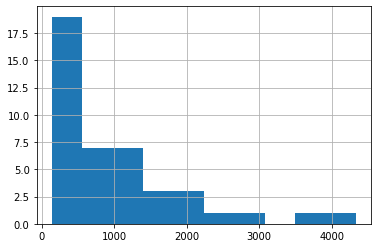

In [36]:
#prueba...
sorted_acc_2012_por_zona["Nº ACC"].hist()

In [37]:
fig = px.line(x=sorted_acc_2012_por_zona["ADM_DSTR"], y=sorted_acc_2012_por_zona["Nº ACC"], labels = {"x": "distritos", "y": "nº accidentes"}, title = "Nº de accidentes por zona (2012)")
#ax.set_xlabel(xlabel, rotation=60)
fig.update_xaxes(tickangle=60)
fig.show()